In [1]:
# Import the libraries, load dataset, print shape of data, data description.

import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import re, string, unicodedata
import nltk           

import os,sys
from scipy import stats

#!pip install contractions
# import contractions

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Understand of data-columns: 

dataset = pd.read_csv("C:\\Users\\Seeni\\PG-AIML\\NLP\\Project\Tweets.csv")

# Shape of data.
dataset.head()

# Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
dataset.shape

(14640, 15)

In [4]:
# print all columns to view and keep only required;

for col in dataset.columns: 
    print(col) 

tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


In [5]:
# Drop all other columns except “text” and “airline_sentiment” 
data = dataset.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)

In [6]:
# Check first 5 rows of dataframe.
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text.
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [7]:
# Removal of the http link using Regular Expression.
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [8]:
dataset.shape

(14640, 15)

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]"


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
dataset.shape

(14640, 15)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

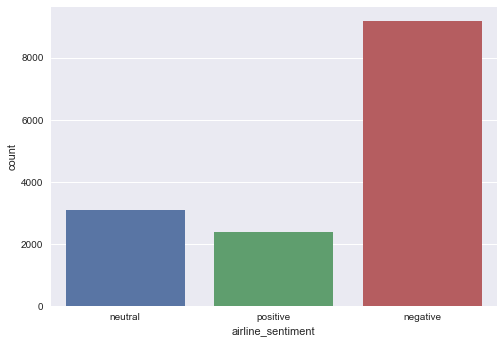

In [13]:
plt.style.use('seaborn')
sns.countplot(data=data,x='airline_sentiment')

# Few additional Imports needed here ***

In [14]:
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [15]:
# save the stopwords in a list named stopwords.
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Now we define set of new functions to normalize, which processes all the steps together whenever needed.

In [16]:
# Removal of Special Characters and Punctuations.

lemmatizer = WordNetLemmatizer()


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [17]:
# Conversion to lowercase

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [18]:
# Remove punctuations

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [19]:
# Stop words in English are “a”, “the”, “is”, “are” and etc.

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [20]:
# Stemming - Reducing inflection in words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [21]:
# Lemmatization : Proper reduction of word inflections

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

# Now it's time to execute the above functions:

In [22]:
def normalize(words):
    clean_review = remove_non_ascii(words)
    clean_review = to_lowercase(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review = remove_stopwords(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review


In [23]:
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, 's, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big, bad, thing, about, it]"


In [24]:
# Join the words in the list to convert back to text string in the dataframe.

clean_review =[]

for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = " ".join(words)
    clean_review.append(data.at[i, 'text'])
   

In [25]:
# Print first 5 rows of data after pre-processing.

data.head()


,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica nt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse
4,negative,virginamerica really big bad thing


In [26]:
data.shape

(14640, 2)

# CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  

count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = None) 
                

count_vectorizer_data_features = count_vectorizer.fit_transform(data)

count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [28]:
print (count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(2, 2)
[[1 0]
 [0 1]]


In [29]:
count_vectorizer_vocab = count_vectorizer.get_feature_names()
print (count_vectorizer_vocab)

['airline_sentiment', 'text']


# TF-IDF - TfidfVectorizer

In [30]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_Features = vectorizer.fit_transform(clean_review).toarray()

# Train and Test Split - Analysis

In [31]:
#Features = data.iloc[1,10].values
Labels = data.iloc[:,1].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(clean_review,Labels,test_size=0.3,random_state=42)

# Build Classifification Models And Error Analysis Comaparison

In [ ]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['airline_sentiment'] = number.fit_transform(data)
    data['text'] = number.fit_transform(data.Source)
    data=data.fillna(-999)
    return data

train=convert(x_train)
test=convert(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(x_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, processed_Features, labels, cv=10)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

result = forest.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
import sys
print(sys.version)

In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200,random_state=None)
text_classifier.fit(x_train,y_train)


In [ ]:
predictions = text_classifier.predict(x_test)


In [ ]:
# KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(x_test, y_test)

In [ ]:
predictions2 = text_classifier2.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

In [ ]:
# Logistic Regression

predictions3 = model.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))

# Summary :

Pre-processed the data using variuos techniques and libraries.
The pre-precessed data is converted to numbers, so that we can feed the data in the model.
After building the classification model, we predicted the result for the test data.
After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building One more way to increase accuracy is to use different variations of Pre-processing techniques.